In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('mydata.csv')
data = data.drop(['term_ 36 months','grade_B','home_ownership_OTHER'],axis = 1)
data.head()

,loan_status,annual_inc,delinq_2yrs,dti,emp_length,int_rate,revol_bal,total_acc,funded_amnt,total_pymnt,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,grade_A,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months
0,1.0,-0.178115,-0.308854,0.272878,10.0,0.1596,0.037014,-0.798600,0.843664,0.574126,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.211231,-0.308854,-1.048249,5.0,0.1629,-0.096776,-0.269427,0.147022,0.150574,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.538062,-0.308854,0.402605,10.0,0.1059,-0.580973,-0.004841,-0.819958,-0.689235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.121840,-0.308854,0.028336,10.0,0.1756,0.936541,0.788918,1.848768,2.730410,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.821737,1.702600,0.252003,1.0,0.1483,1.563480,0.083355,1.952745,2.118599,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
# Split the dataset into training and testing sets
X = data.drop('loan_status', axis=1)
y = data['loan_status']

### Naive Bayesian analysis

In [4]:
# Using Naive Bayesian analysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

class NBA:
    def __init__(self, x_train, y_train, x_test, y_test, priors = None, var_smoothing = 1e-9):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.priors = priors
        self.var_smoothing = var_smoothing
        beta = None
        self.model = GaussianNB(priors = self.priors, var_smoothing = self.var_smoothing)
        self.model.fit(self.x_train, self.y_train)
        self.y_pred = self.model.predict(self.x_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.accuracy = accuracy_score(self.y_test, self.y_pred)
        self.f1 = f1_score(self.y_test, self.y_pred)
        beta = self.model.theta_
        self.beta = beta

    def get_accuracy(self):
        return self.accuracy
    
    def get_f1(self):
        return self.f1
    
    def get_beta(self):
        return self.beta
    
    def get_y_pred(self):
        return self.y_pred
    

# calling the class
y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    nba = NBA(X_train, y_train, X_test, y_test)
    y_pred = nba.get_y_pred()
    y_pred_list.append(y_pred)
    accuracy_list.append(nba.get_accuracy())
    f1_score_list.append(nba.get_f1())
    beta_list.append(nba.get_beta())

Confusion Matrix NBA:
[[ 63 110]
 [105 856]]
Classification Report NBA:
              precision    recall  f1-score   support

         0.0       0.38      0.36      0.37       173
         1.0       0.89      0.89      0.89       961

    accuracy                           0.81      1134
   macro avg       0.63      0.63      0.63      1134
weighted avg       0.81      0.81      0.81      1134



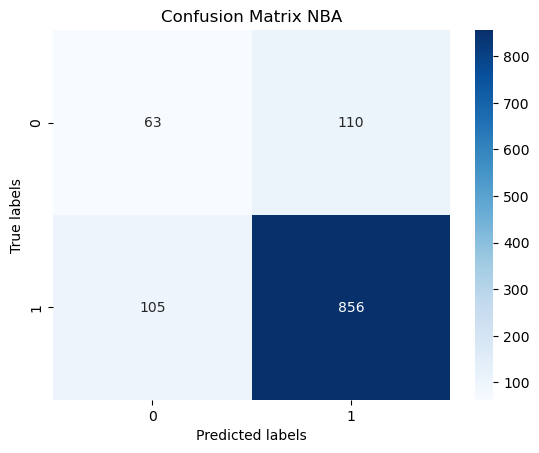

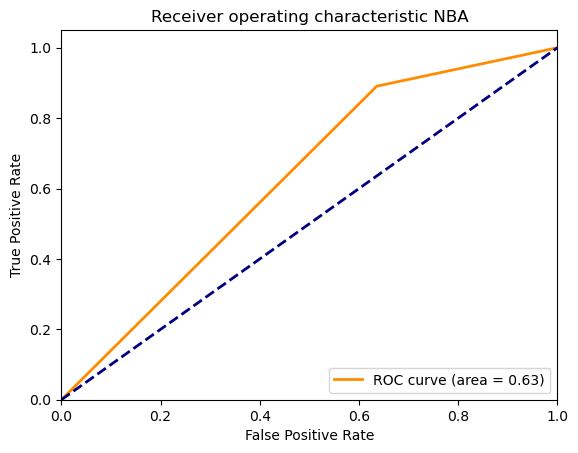

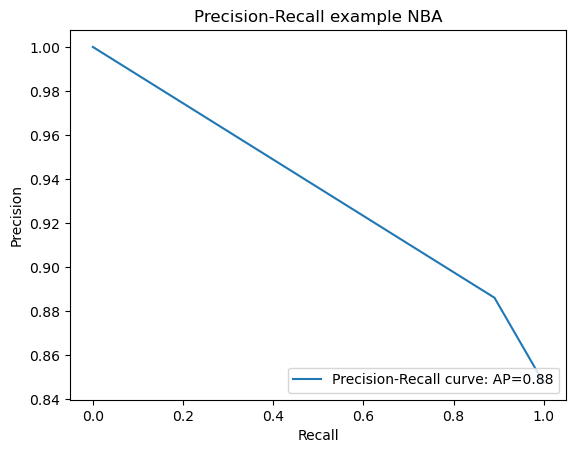

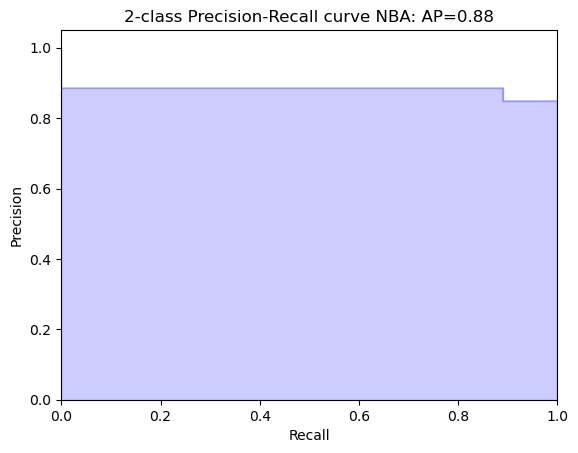

In [5]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix NBA:')
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print('Classification Report NBA:')
print(cr)


# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix NBA')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic NBA')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example NBA')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve NBA: AP={0:0.2f}'.format(
            average_precision))
plt.show()

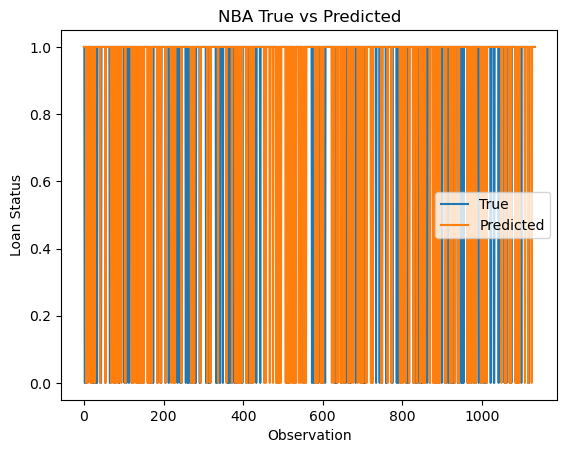

In [6]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('NBA True vs Predicted')
plt.legend()
plt.show()


### Fisher linear Discriminant analysis

In [7]:
# Using fisher linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score

class LinearDiscriminantAnalysisModel:
    def __init__(self, n_components):
        self.n_components = n_components
        self.lda = LinearDiscriminantAnalysis(n_components=self.n_components)
        
    def fit(self, X, y):
        self.lda.fit(X, y)
        return self
    
    def transform(self, X):
        return self.lda.transform(X)
    
    def predict(self, X):
        return self.lda.predict(X)
    
    def score(self, X, y):
        return self.lda.score(X, y)
    
    def get_params(self, deep=True):
        return {'n_components': self.n_components}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def __repr__(self):
        return 'LinearDiscriminantAnalysisModel(n_components={})'.format(self.n_components)
    

# calling the class
y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    lda = LinearDiscriminantAnalysisModel(n_components=1)
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(lda.lda.coef_)

Confusion Matrix FLDA:
[[ 95  78]
 [  3 958]]
Classification Report FLDA:
              precision    recall  f1-score   support

         0.0       0.97      0.55      0.70       173
         1.0       0.92      1.00      0.96       961

    accuracy                           0.93      1134
   macro avg       0.95      0.77      0.83      1134
weighted avg       0.93      0.93      0.92      1134



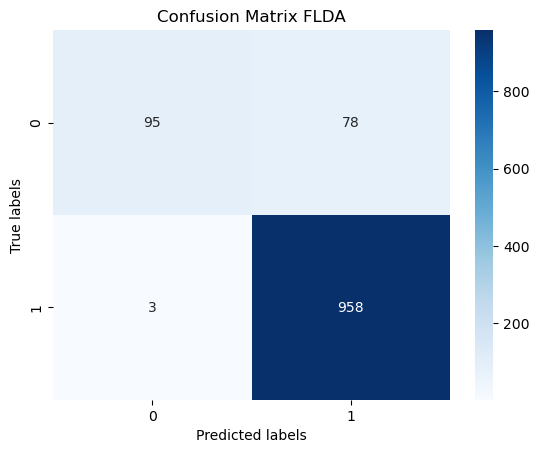

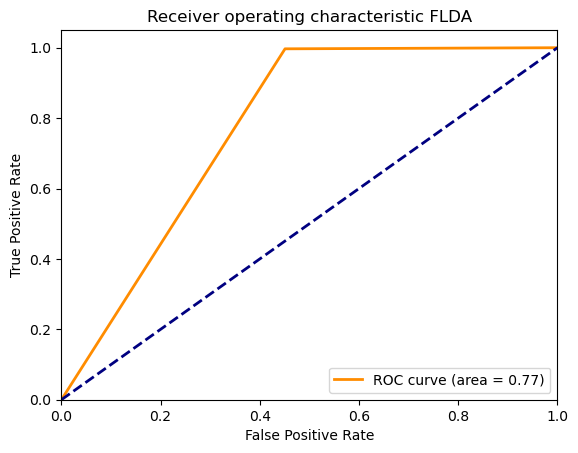

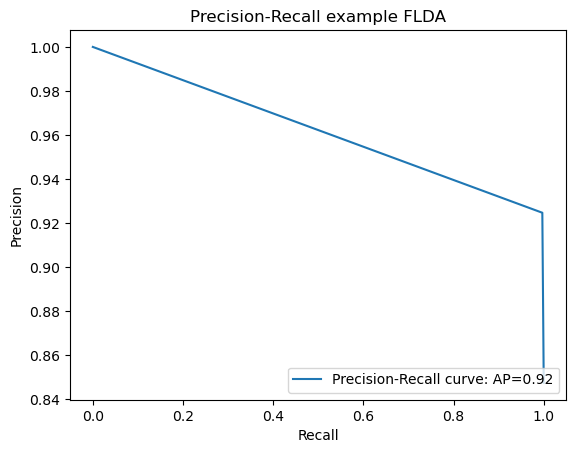

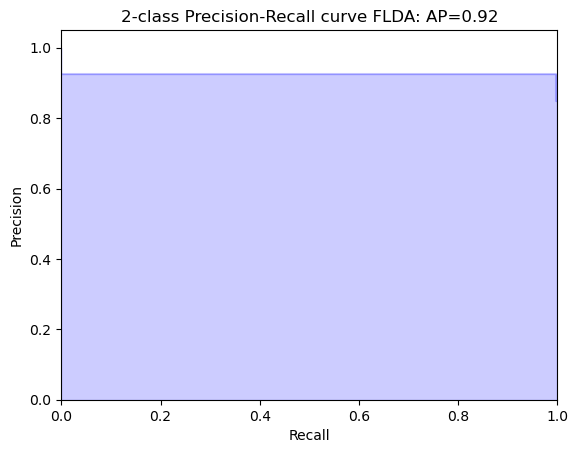

In [8]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix FLDA:')
print(cm)


# Classification Report
print('Classification Report FLDA:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix FLDA')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic FLDA')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example FLDA')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FLDA: AP={0:0.2f}'.format(
            average_precision))
plt.show()

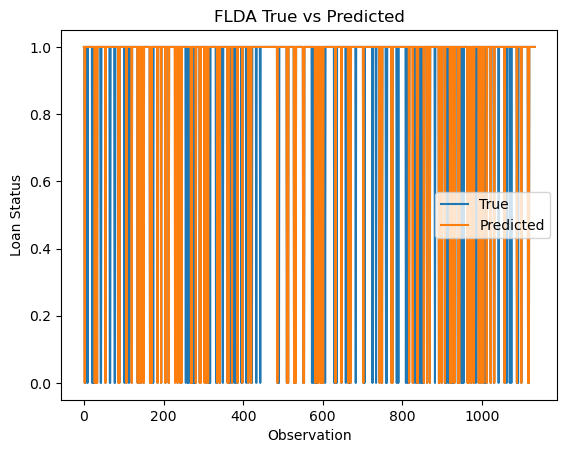

In [9]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('FLDA True vs Predicted')
plt.legend()
plt.show()


### Gaussian discriminant analysis

In [10]:
# Using Gaussian discriminant analysis without sklearn

class GDA:
    def __init__(self, reg=1e-6):
        self.mean = None
        self.cov = None
        self.prior = None
        self.classes = None
        self.d = None
        self.reg = reg

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.d = X.shape[1]
        self.mean = np.zeros((len(self.classes), self.d))
        self.cov = np.zeros((len(self.classes), self.d, self.d))
        self.prior = np.zeros(len(self.classes))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = np.mean(X_c, axis=0)
            self.cov[i, :, :] = np.cov(X_c.T) + np.eye(self.d) * self.reg
            self.prior[i] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            posterior = []
            for j, c in enumerate(self.classes):
                prior = np.log(self.prior[j])
                mean = self.mean[j, :]
                cov = self.cov[j, :, :]
                posterior.append(prior - 0.5 * np.log(np.linalg.det(cov)) - 0.5 * (x - mean).T.dot(np.linalg.inv(cov)).dot(x - mean))
            y_pred[i] = self.classes[np.argmax(posterior)]
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    
# calling the class
y_pred_list = []
accuracy_list = []
f1_score_list = []
# parameters estimated list
mean_list = []
cov_list = []
prior_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    gda = GDA()
    gda.fit(X_train, y_train)
    y_pred = gda.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy = gda.score(X_test, y_test)
    accuracy_list.append(accuracy)
    from sklearn.metrics import f1_score
    f1_score = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1_score)
    mean_list.append(gda.mean)
    cov_list.append(gda.cov)
    prior_list.append(gda.prior)

Confusion Matrix GDA:
[[128  45]
 [ 42 919]]
Classification Report GDA:
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       173
         1.0       0.95      0.96      0.95       961

    accuracy                           0.92      1134
   macro avg       0.85      0.85      0.85      1134
weighted avg       0.92      0.92      0.92      1134



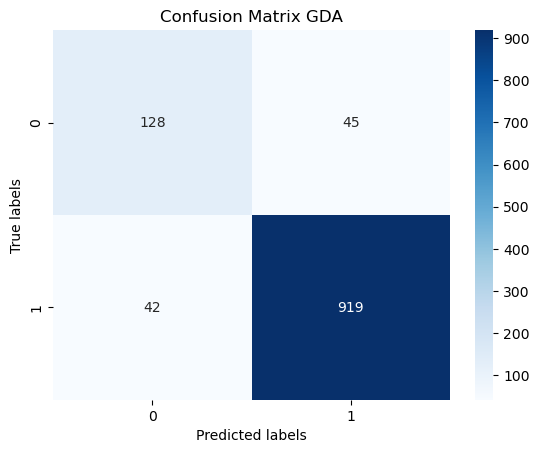

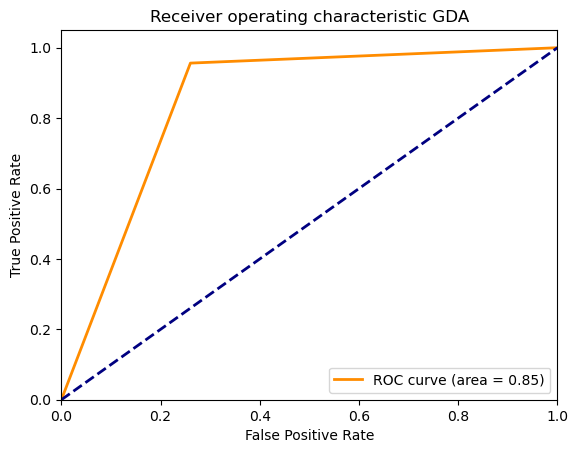

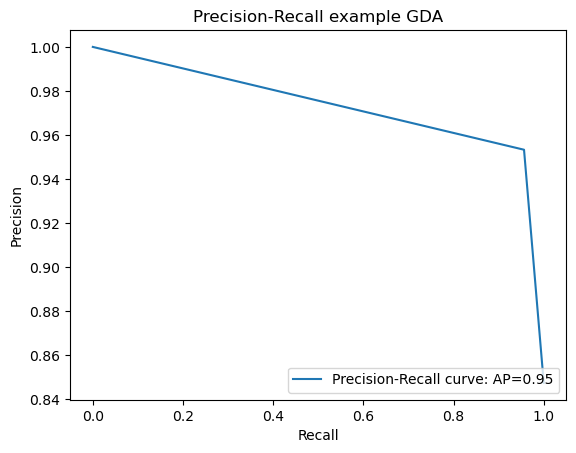

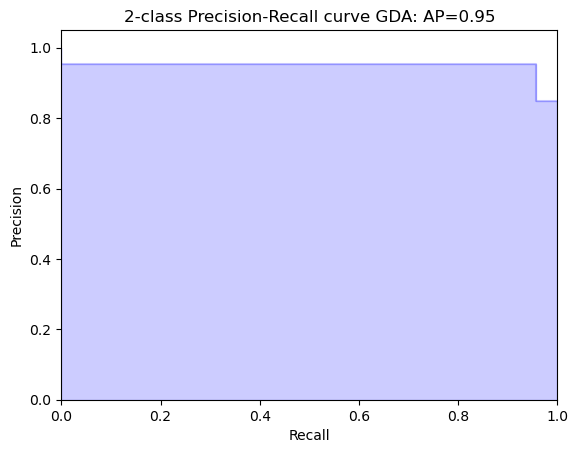

In [11]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix GDA:')
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print('Classification Report GDA:')
print(cr)


# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix GDA')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic GDA')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example GDA')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve GDA: AP={0:0.2f}'.format(
            average_precision))
plt.show()

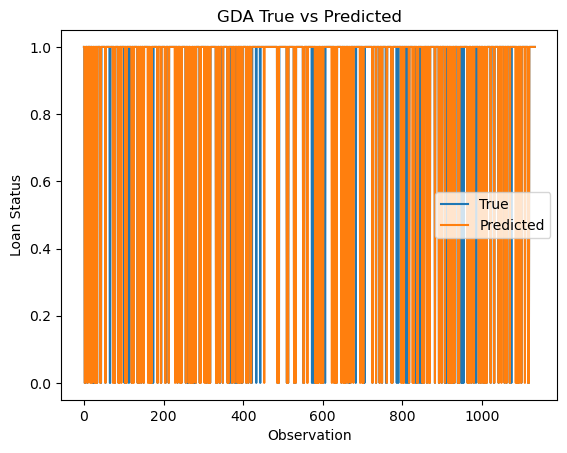

In [12]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('GDA True vs Predicted')
plt.legend()
plt.show()


### Scaling the data

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression Model

In [14]:
# Using Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

class LogisticRegressionModel:
    def __init__(self, C=1.0, tol = 0.0001, max_iter=50000):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.logistic_regression = LogisticRegression(C=self.C, tol=self.tol, max_iter=self.max_iter)

    def fit(self, X, y):
        self.logistic_regression.fit(X, y)
        return self
    
    def predict(self, X):
        return self.logistic_regression.predict(X)
    
    def score(self, X, y):
        return self.logistic_regression.score(X, y)
    
    def get_params(self, deep=True):
        return {'C': self.C, 'tol': self.tol, 'max_iter': self.max_iter}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def get_coef(self):
        return self.logistic_regression.coef_
    

# calling the class
y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    logistic_regression = LogisticRegressionModel(C=1.0, tol = 0.0001, max_iter=50000)
    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(logistic_regression.logistic_regression.coef_)
    

Confusion Matrix Logistic:
[[141  32]
 [  2 959]]
Classification Report Logistic:
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.89       173
         1.0       0.97      1.00      0.98       961

    accuracy                           0.97      1134
   macro avg       0.98      0.91      0.94      1134
weighted avg       0.97      0.97      0.97      1134



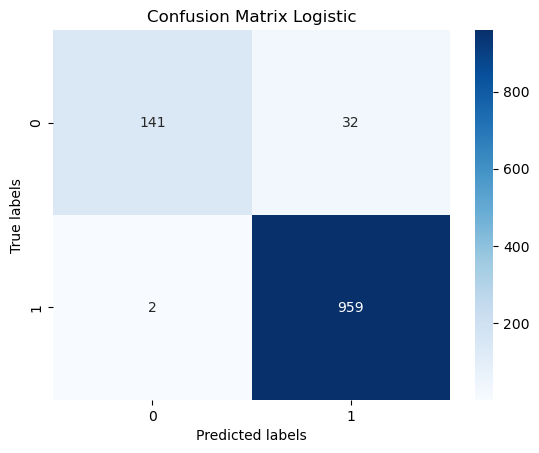

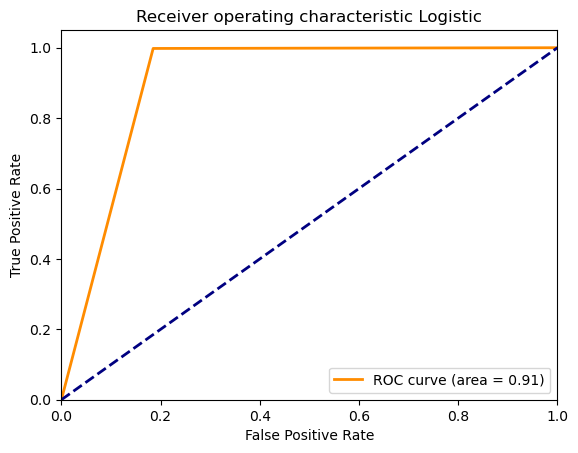

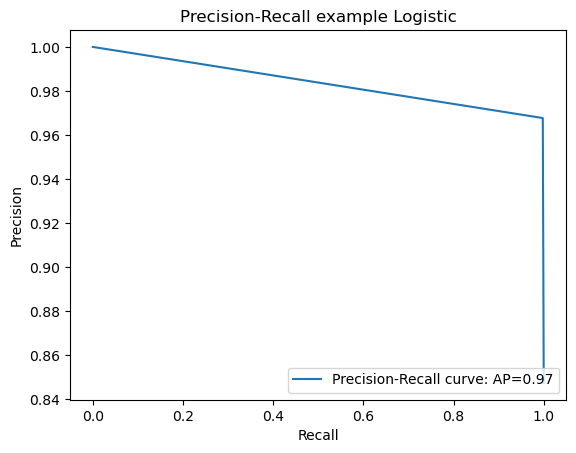

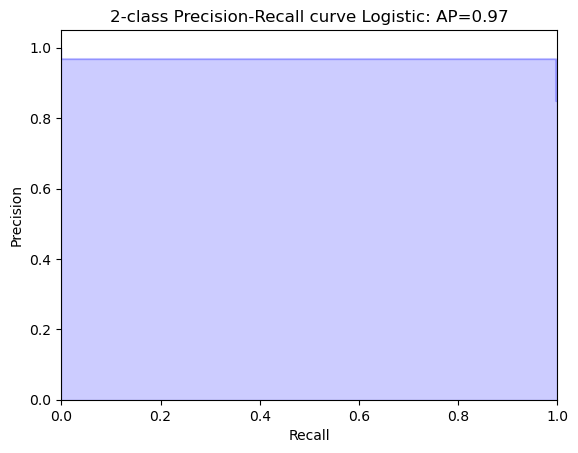

In [15]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Logistic:')
print(cm)


# Classification Report
print('Classification Report Logistic:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Logistic')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Logistic')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Logistic')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Logistic: AP={0:0.2f}'.format(
            average_precision))
plt.show()




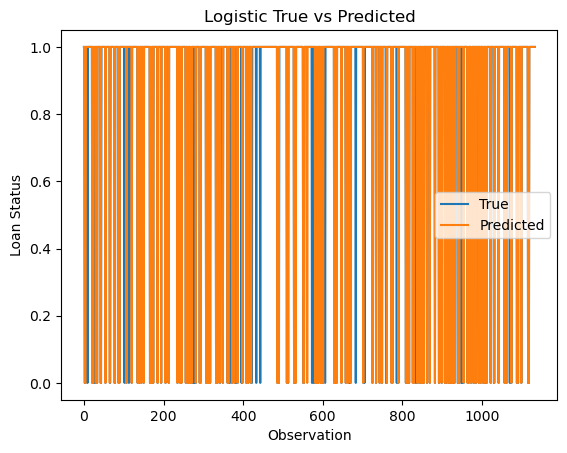

In [16]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Logistic True vs Predicted')
plt.legend()
plt.show()


### Soft SVM with C = 1

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# computing soft margin SVM
clf = SVC(kernel='linear', C=1.0)

#  creating a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

# Perform 5-fold cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# Print the mean accuracy
print('Mean accuracy: {:.4f}'.format(np.mean(scores)))

y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Fit the pipeline to the training set
    pipe.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = pipe.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(pipe.named_steps['svc'].coef_)

Mean accuracy: 0.9629


Confusion Matrix Soft SVM with C = 1:
[[146  27]
 [  1 960]]
Classification Report Soft SVM with C = 1:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       173
         1.0       0.97      1.00      0.99       961

    accuracy                           0.98      1134
   macro avg       0.98      0.92      0.95      1134
weighted avg       0.98      0.98      0.97      1134



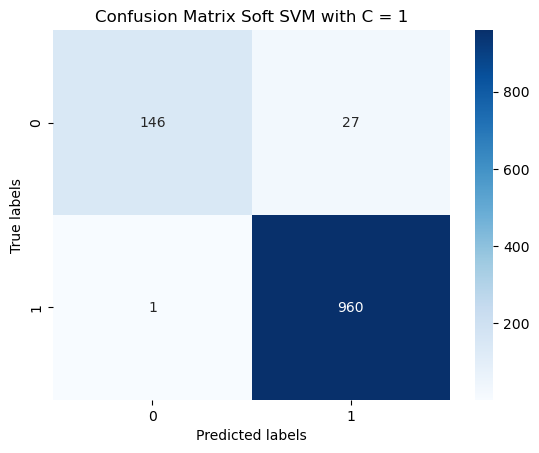

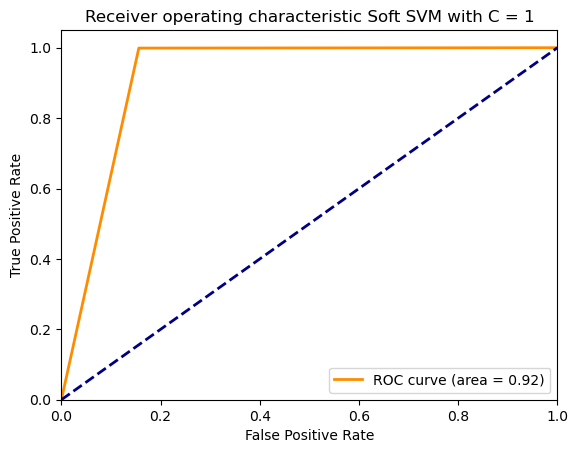

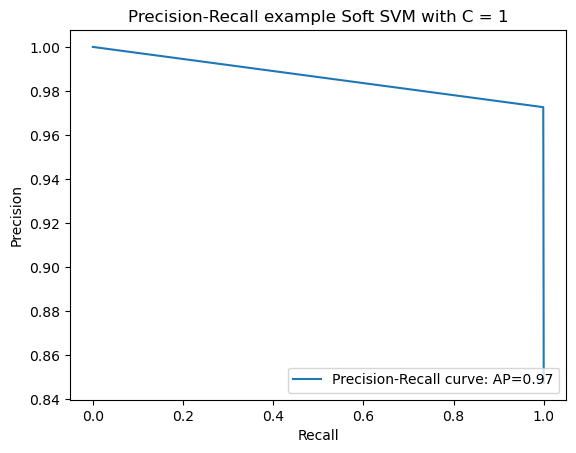

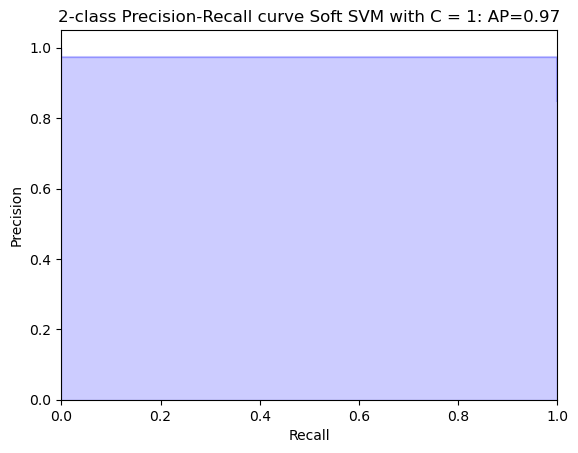

In [18]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Soft SVM with C = 1:')
print(cm)


# Classification Report
print('Classification Report Soft SVM with C = 1:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Soft SVM with C = 1')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Soft SVM with C = 1')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Soft SVM with C = 1')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Soft SVM with C = 1: AP={0:0.2f}'.format(
            average_precision))
plt.show()

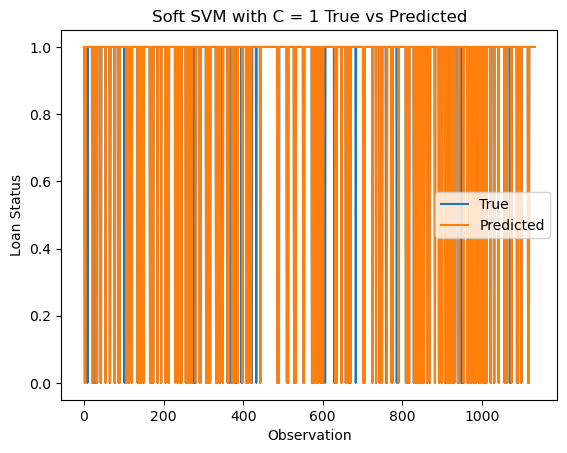

In [19]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Soft SVM with C = 1 True vs Predicted')
plt.legend()
plt.show()

### Soft SVM with C = 0.1

In [20]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# computing soft margin SVM
clf = SVC(kernel='linear', C=0.1)

#  creating a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

# Perform 5-fold cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# Print the mean accuracy
print('Mean accuracy: {:.4f}'.format(np.mean(scores)))

y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Fit the pipeline to the training set
    pipe.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = pipe.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(pipe.named_steps['svc'].coef_)

Mean accuracy: 0.9481


Confusion Matrix Soft SVM with C = 0.1:
[[124  49]
 [  0 961]]
Classification Report Soft SVM with C = 0.1:
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84       173
         1.0       0.95      1.00      0.98       961

    accuracy                           0.96      1134
   macro avg       0.98      0.86      0.91      1134
weighted avg       0.96      0.96      0.95      1134



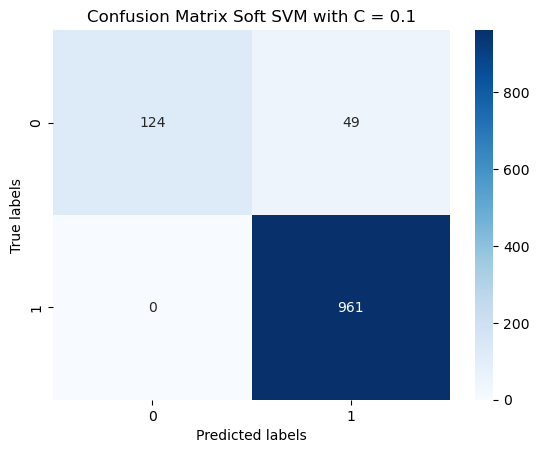

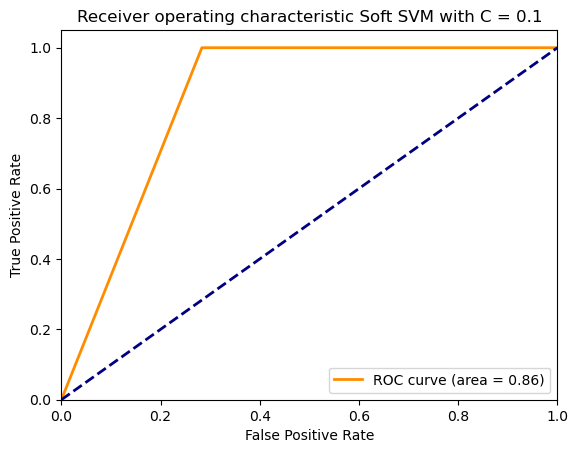

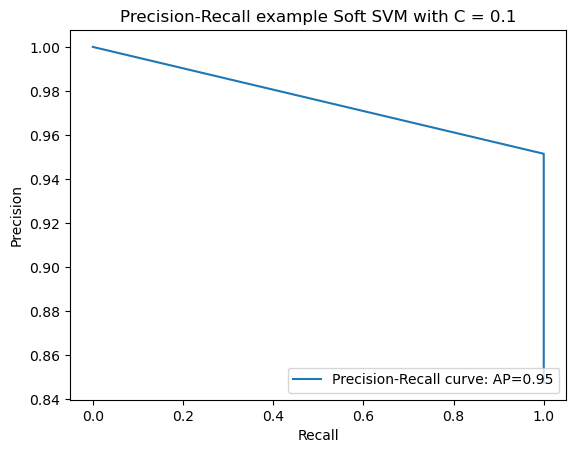

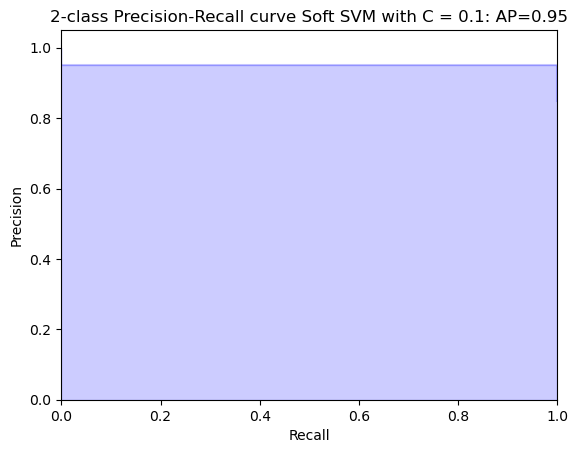

In [21]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Soft SVM with C = 0.1:')
print(cm)


# Classification Report
print('Classification Report Soft SVM with C = 0.1:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Soft SVM with C = 0.1')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Soft SVM with C = 0.1')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Soft SVM with C = 0.1')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Soft SVM with C = 0.1: AP={0:0.2f}'.format(
            average_precision))
plt.show()

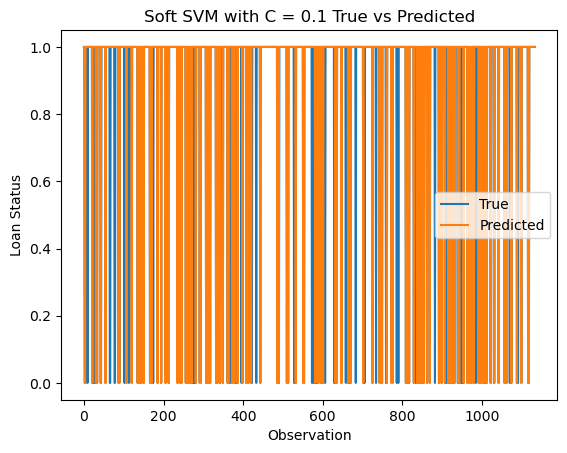

In [22]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Soft SVM with C = 0.1 True vs Predicted')
plt.legend()
plt.show()

### Soft SVM with C = 0.01

In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# computing soft margin SVM
clf = SVC(kernel='linear', C=0.01)

#  creating a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

# Perform 5-fold cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# Print the mean accuracy
print('Mean accuracy: {:.4f}'.format(np.mean(scores)))

y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Fit the pipeline to the training set
    pipe.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = pipe.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(pipe.named_steps['svc'].coef_)

Mean accuracy: 0.9011


Confusion Matrix Soft SVM with C = 0.01:
[[ 64 109]
 [  0 961]]
Classification Report Soft SVM with C = 0.01:
              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54       173
         1.0       0.90      1.00      0.95       961

    accuracy                           0.90      1134
   macro avg       0.95      0.68      0.74      1134
weighted avg       0.91      0.90      0.88      1134



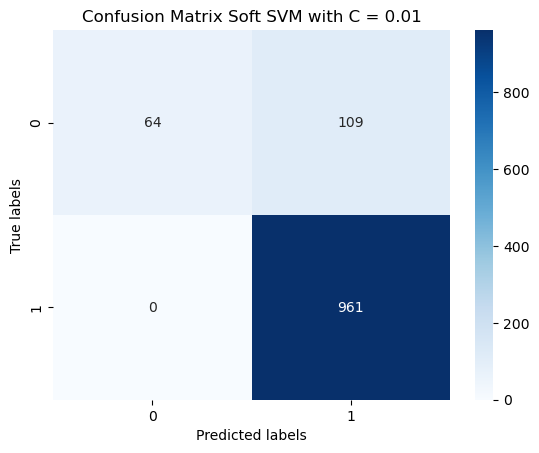

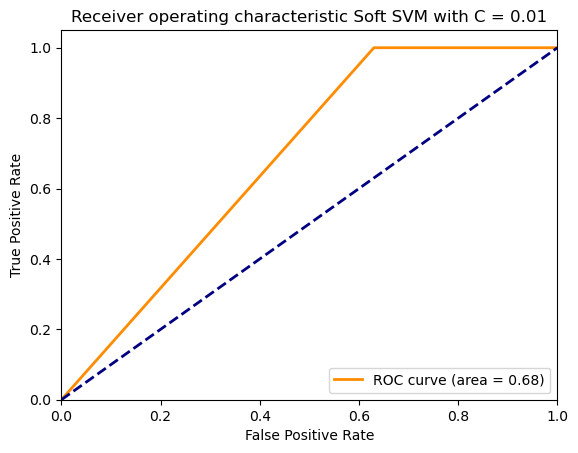

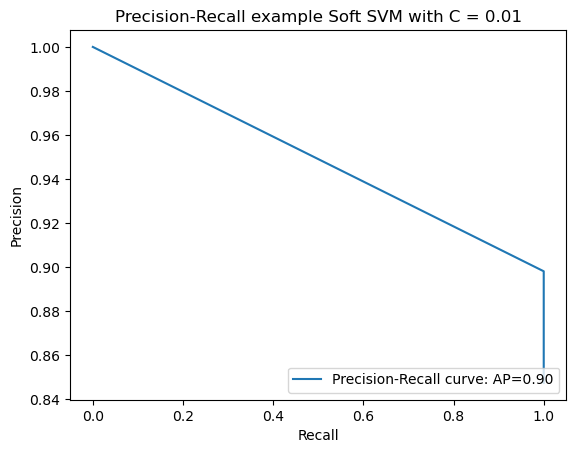

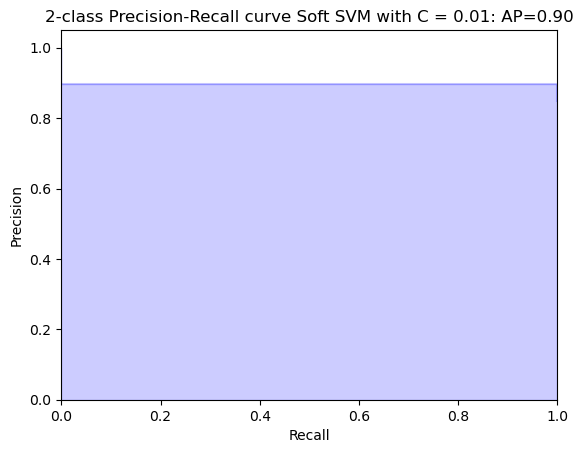

In [24]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Soft SVM with C = 0.01:')
print(cm)


# Classification Report
print('Classification Report Soft SVM with C = 0.01:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Soft SVM with C = 0.01')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Soft SVM with C = 0.01')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Soft SVM with C = 0.01')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Soft SVM with C = 0.01: AP={0:0.2f}'.format(
            average_precision))
plt.show()

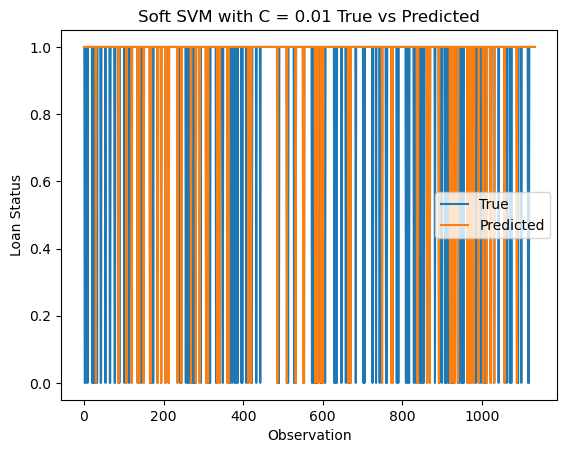

In [25]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Soft SVM with C = 0.01 True vs Predicted')
plt.legend()
plt.show()

### Kernel SVM Using RBF

In [26]:

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Using Kernel SVM model
classifier = SVC(kernel = 'rbf', gamma = 'auto', C = 1.0)

# create a pipeline
pipe = Pipeline([('classifier' , classifier)])

# cross validation
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print('Mean Cross-Validation Score', scores.mean())

y_pred_list = []
accuracy_list = []
f1_score_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    # Fit the model
    pipe.fit(X_train, y_train)
    # Predict the test set results
    y_pred = pipe.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy)
    f1_score_list.append(f1)
    


Mean Cross-Validation Score 0.928068420501812


Confusion Matrix Kernel SVM Using RBF:
[[ 98  75]
 [  0 961]]
Classification Report Kernel SVM Using RBF:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.72       173
         1.0       0.93      1.00      0.96       961

    accuracy                           0.93      1134
   macro avg       0.96      0.78      0.84      1134
weighted avg       0.94      0.93      0.93      1134



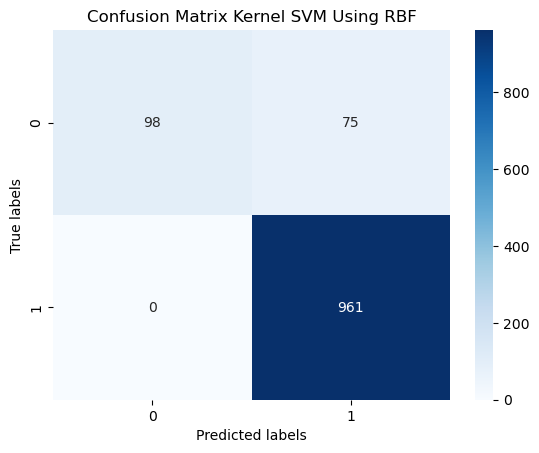

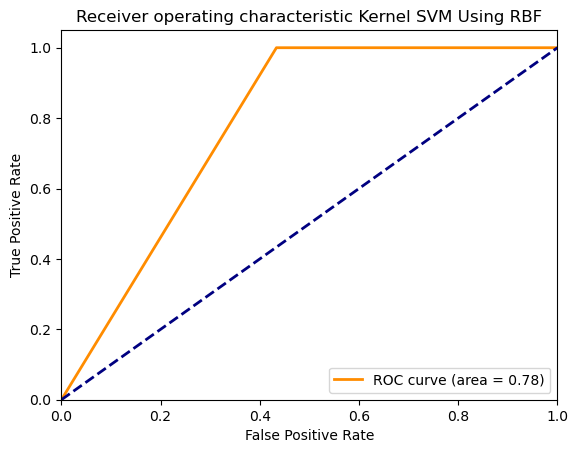

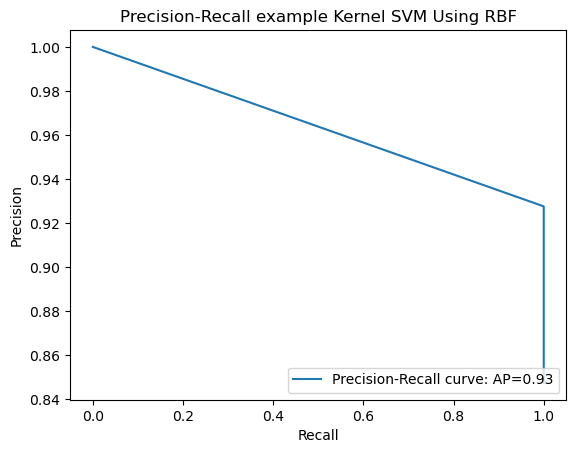

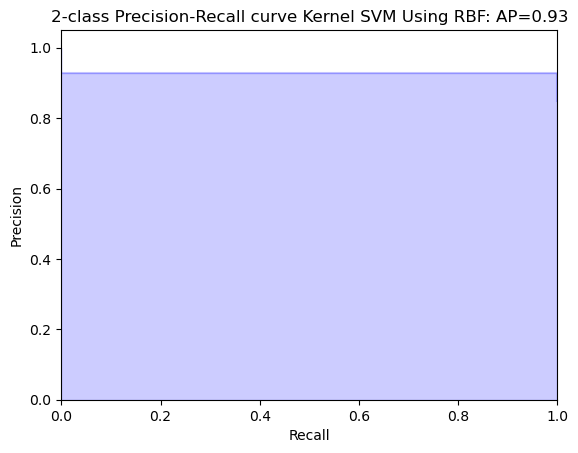

In [27]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Kernel SVM Using RBF:')
print(cm)


# Classification Report
print('Classification Report Kernel SVM Using RBF:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Kernel SVM Using RBF')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Kernel SVM Using RBF')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Kernel SVM Using RBF')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Kernel SVM Using RBF: AP={0:0.2f}'.format(
            average_precision))
plt.show()

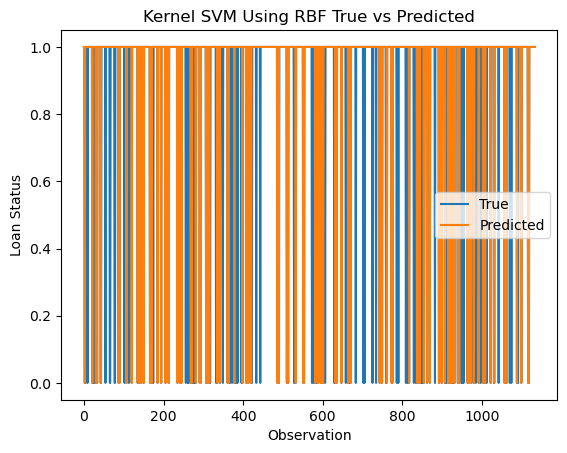

In [28]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Kernel SVM Using RBF True vs Predicted')
plt.legend()
plt.show()

### Kernel SVM Using Poly

In [29]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

degree = 3  # Specify the degree of the polynomial
C = 1.0  # Specify the regularization parameter

# Using Kernel SVM model
classifier = SVC(kernel = 'poly', degree= degree, C = C, gamma='auto')


# create a pipeline
pipe = Pipeline([('classifier' , classifier)])

# cross validation
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print('Mean Cross-Validation Score', scores.mean())

y_pred_list = []
accuracy_list = []
f1_score_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    # Fit the model
    pipe.fit(X_train, y_train)
    # Predict the test set results
    y_pred = pipe.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy)
    f1_score_list.append(f1)

Mean Cross-Validation Score 0.9225520905588371


Confusion Matrix Kernel SVM Using Poly:
[[ 97  76]
 [  5 956]]
Classification Report Kernel SVM Using Poly:
              precision    recall  f1-score   support

         0.0       0.95      0.56      0.71       173
         1.0       0.93      0.99      0.96       961

    accuracy                           0.93      1134
   macro avg       0.94      0.78      0.83      1134
weighted avg       0.93      0.93      0.92      1134



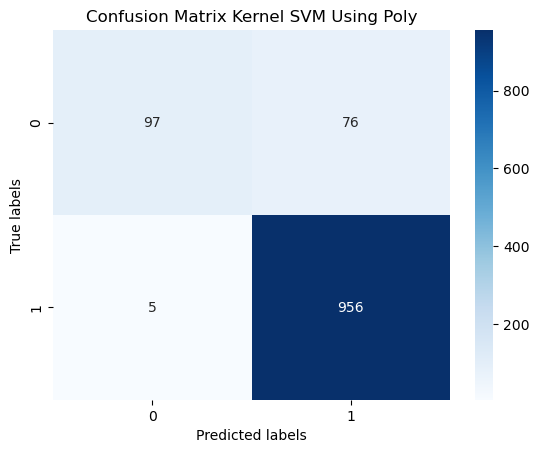

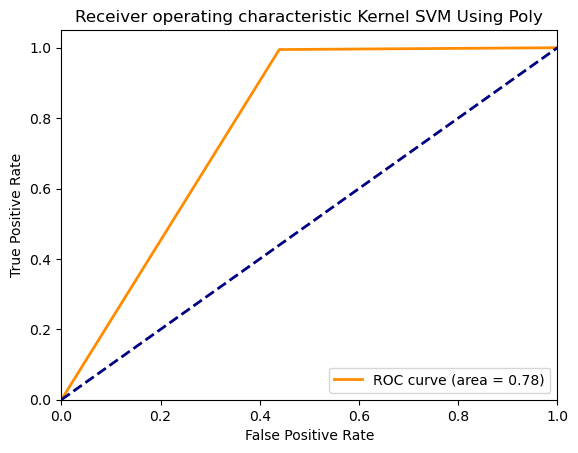

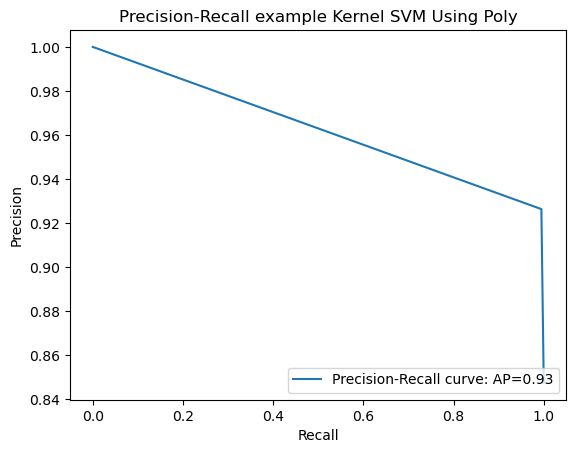

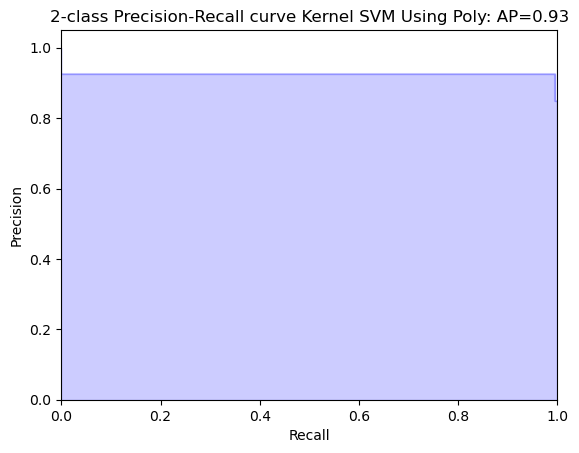

In [30]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Kernel SVM Using Poly:')
print(cm)


# Classification Report
print('Classification Report Kernel SVM Using Poly:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Kernel SVM Using Poly')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Kernel SVM Using Poly')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Kernel SVM Using Poly')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Kernel SVM Using Poly: AP={0:0.2f}'.format(
            average_precision))
plt.show()

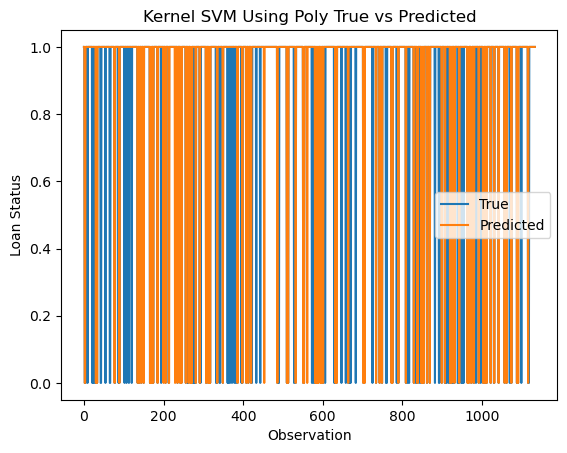

In [31]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Kernel SVM Using Poly True vs Predicted')
plt.legend()
plt.show()

### Hard SVM with C = 1000

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear', C=1000)

#  creating a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

# Perform 5-fold cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# Print the mean accuracy
print('Mean accuracy: {:.4f}'.format(np.mean(scores)))

y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Fit the pipeline to the training set
    pipe.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = pipe.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(pipe.named_steps['svc'].coef_)


Mean accuracy: 0.9687


Confusion Matrix Hard SVM:
[[147  26]
 [  1 960]]
Classification Report Hard SVM:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       173
         1.0       0.97      1.00      0.99       961

    accuracy                           0.98      1134
   macro avg       0.98      0.92      0.95      1134
weighted avg       0.98      0.98      0.98      1134



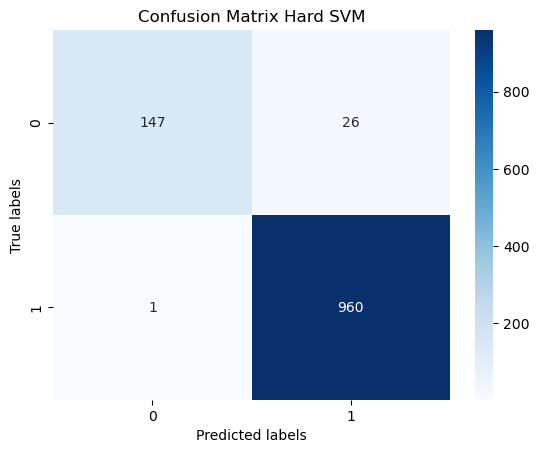

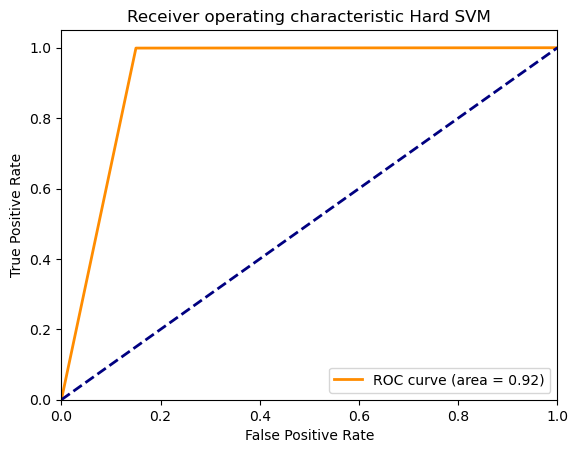

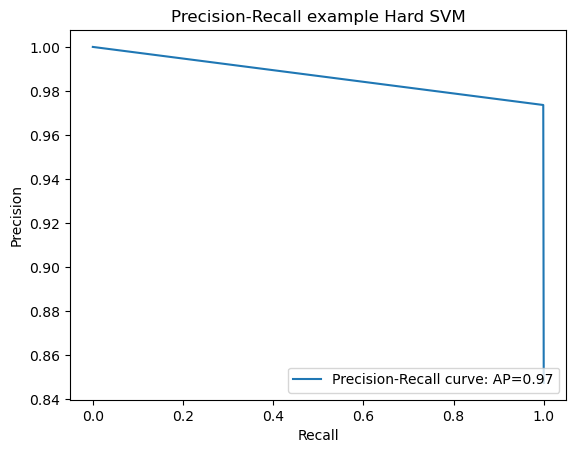

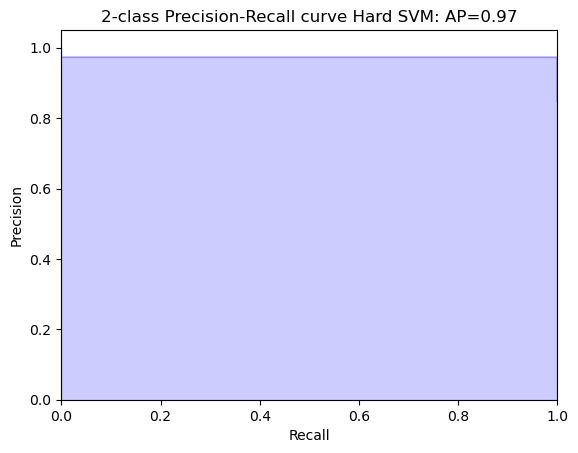

In [33]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Hard SVM:')
print(cm)


# Classification Report
print('Classification Report Hard SVM:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Hard SVM')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Hard SVM')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Hard SVM')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Hard SVM: AP={0:0.2f}'.format(
            average_precision))
plt.show()

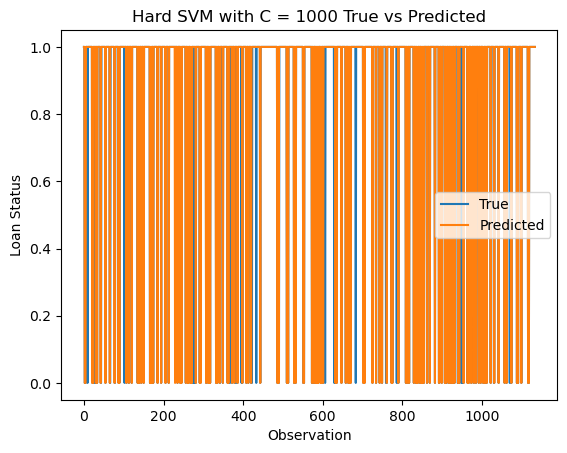

In [34]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Hard SVM with C = 1000 True vs Predicted')
plt.legend()
plt.show()


### Hard SVM with C = 10000

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear', C=10000)

#  creating a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

# Perform 5-fold cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# Print the mean accuracy
print('Mean accuracy: {:.4f}'.format(np.mean(scores)))

y_pred_list = []
accuracy_list = []
f1_score_list = []
beta_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Fit the pipeline to the training set
    pipe.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = pipe.predict(X_test)
    y_pred_list.append(y_pred)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    beta_list.append(pipe.named_steps['svc'].coef_)


Mean accuracy: 0.9687


Confusion Matrix Hard SVM with C = 10000:
[[147  26]
 [  1 960]]
Classification Report Hard SVM with C = 10000:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       173
         1.0       0.97      1.00      0.99       961

    accuracy                           0.98      1134
   macro avg       0.98      0.92      0.95      1134
weighted avg       0.98      0.98      0.98      1134



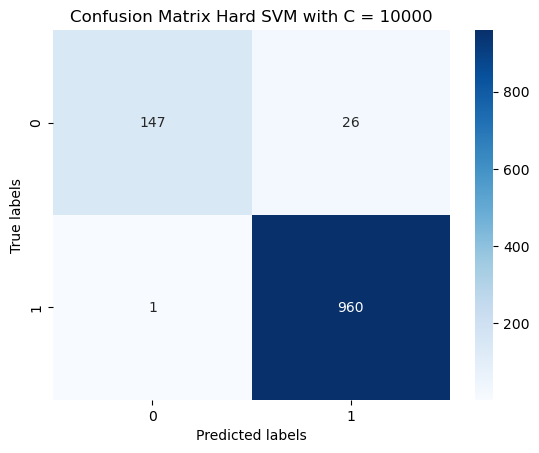

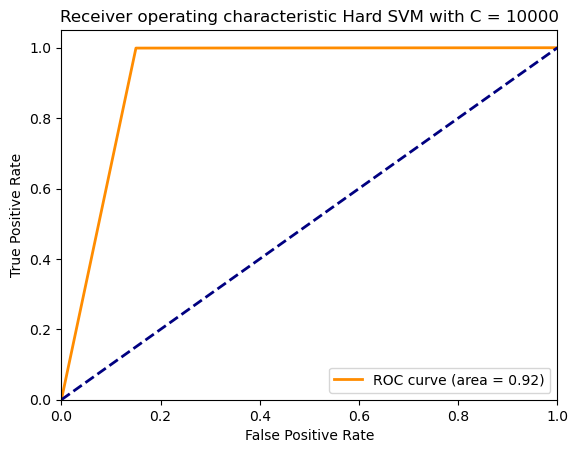

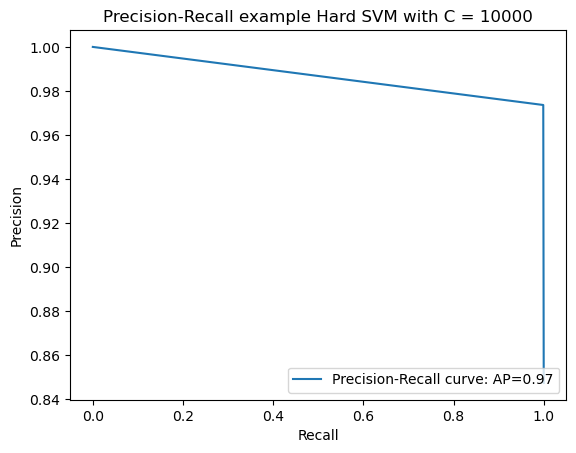

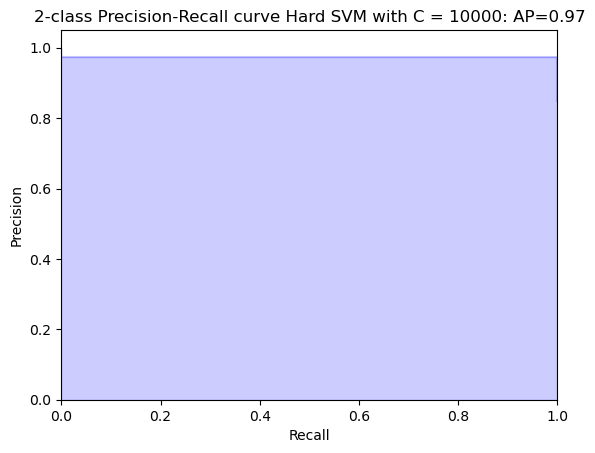

In [36]:
# Validation of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix Hard SVM with C = 10000:')
print(cm)


# Classification Report
print('Classification Report Hard SVM with C = 10000:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Hard SVM with C = 10000')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Hard SVM with C = 10000')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall example Hard SVM with C = 10000')
plt.legend(loc="lower right")
plt.show()



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Hard SVM with C = 10000: AP={0:0.2f}'.format(
            average_precision))
plt.show()

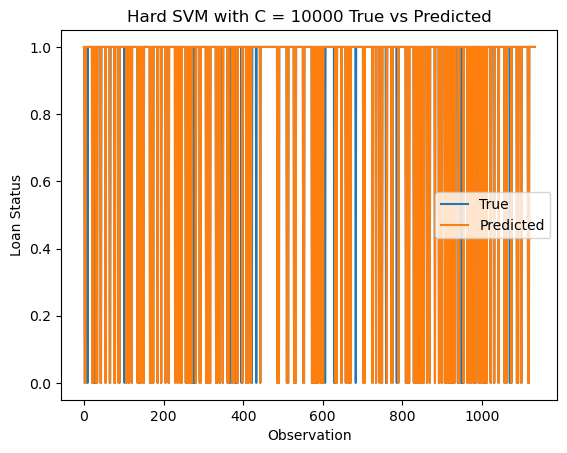

In [37]:
# plot the predicted
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Loan Status')
plt.title('Hard SVM with C = 10000 True vs Predicted')
plt.legend()
plt.show()
